<a href="https://colab.research.google.com/github/Vinicius-Quadros/Pratica_Maquina/blob/main/Pratica_Profissional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing

In [1]:
#Configuração Inicial
#carregar o dataset
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dataset
data = fetch_california_housing()  # Nome correto da função
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Preco'] = data.target  # Variável alvo: preço médio de casas (em 100k USD)

# Exibir as primeiras linhas do dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Preco
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
#Entender a estrutura dos dados
df.describe()
df.info()  # Verificar tipos de dados e valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Preco       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


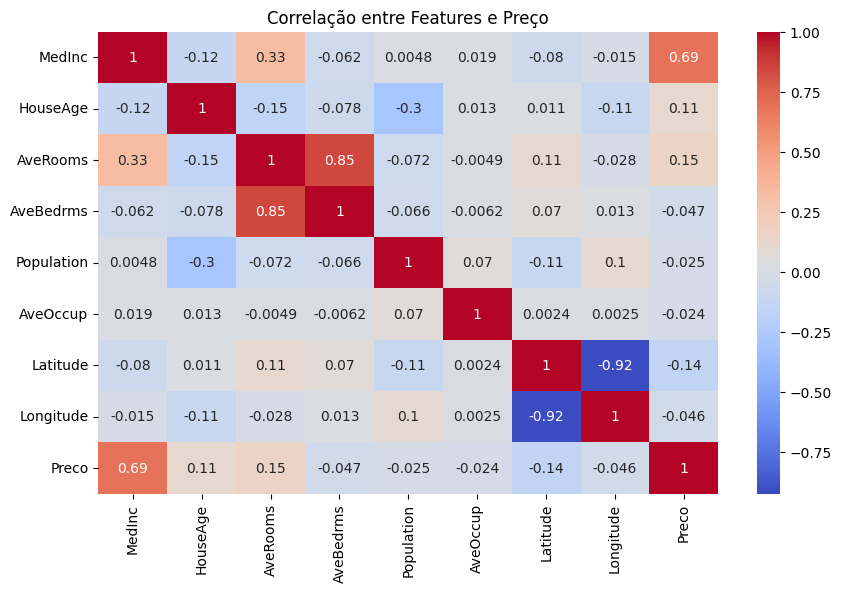

In [3]:
#Visualizar correlações
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Features e Preço')
plt.show()

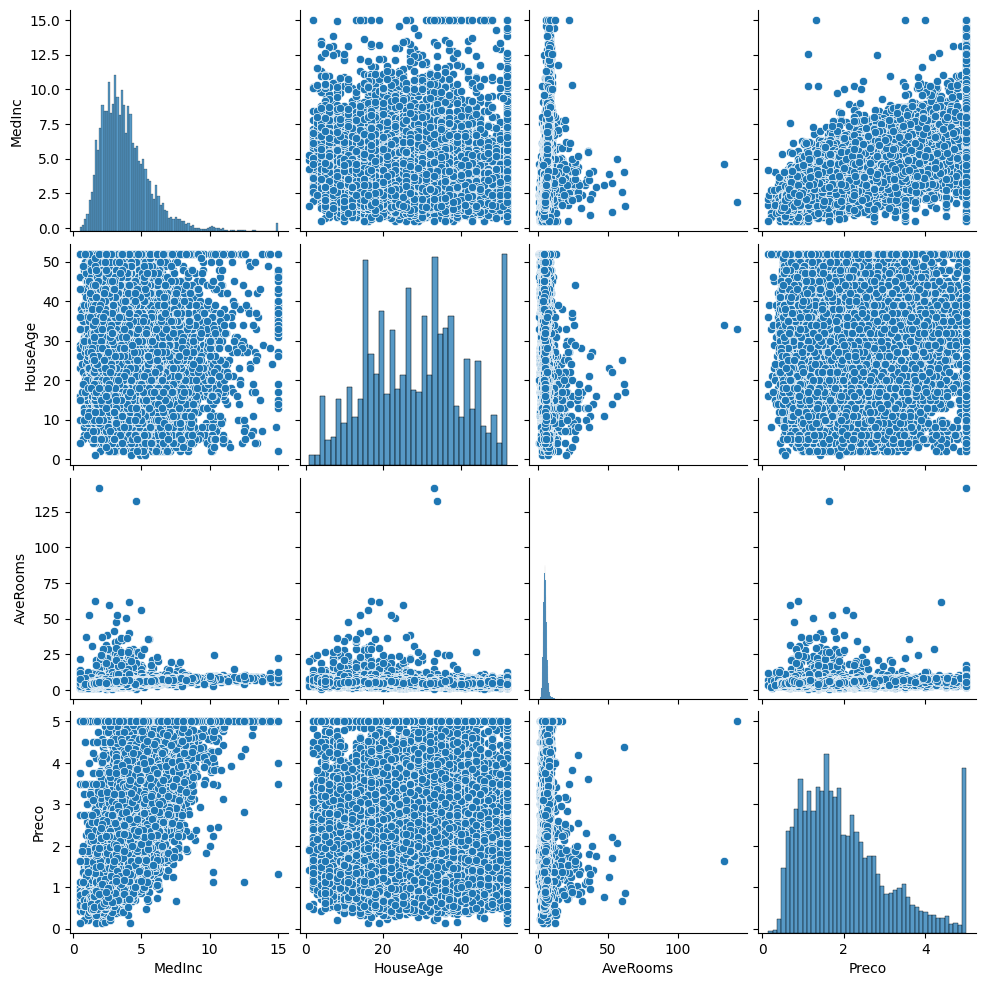

In [4]:
#Plotar distribuições
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'Preco']])
plt.show()

In [5]:
  #Tratar outliers
  # Exemplo: Remover registros com "AveRooms" > 20
  df = df[df['AveRooms'] <= 10]

In [6]:
#Dividir dataset em treino e teste
X = df.drop('Preco', axis=1)
y = df['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Normalizar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#Modelo 1: Regressão Linear
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [9]:
#Modelo 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [10]:
#Modelo 3: XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

In [11]:
#Avaliação dos Modelos
#Calcular Métricas:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name}:')
    print(f'MSE: {mse:.2f}')
    print(f'R²: {r2:.2f}\n')

evaluate_model(y_test, y_pred_lr, 'Regressão Linear')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

Regressão Linear:
MSE: 0.51
R²: 0.62

Random Forest:
MSE: 0.24
R²: 0.82

XGBoost:
MSE: 0.21
R²: 0.84



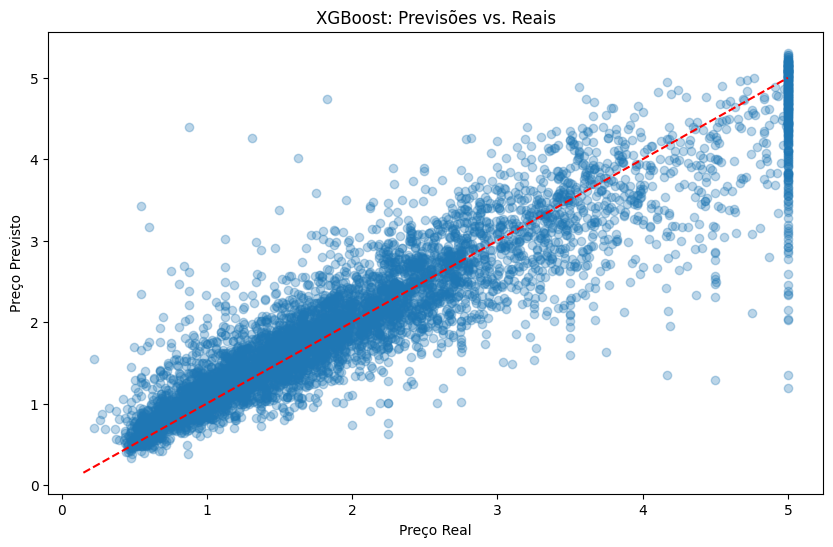

In [12]:
#Interpretação e Visualização
#Comparar previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('XGBoost: Previsões vs. Reais')
plt.show()

Importâncias - Random Forest: [0.51795934 0.04766461 0.04549896 0.02999028 0.03067423 0.13971551
 0.09436789 0.09412917]
Importâncias - XGBoost: [0.5215777  0.06187025 0.04786713 0.02216841 0.01850485 0.15811019
 0.08108394 0.08881752]
Importância das Features - Random Forest


<ipython-input-13-aa2b499ea777>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


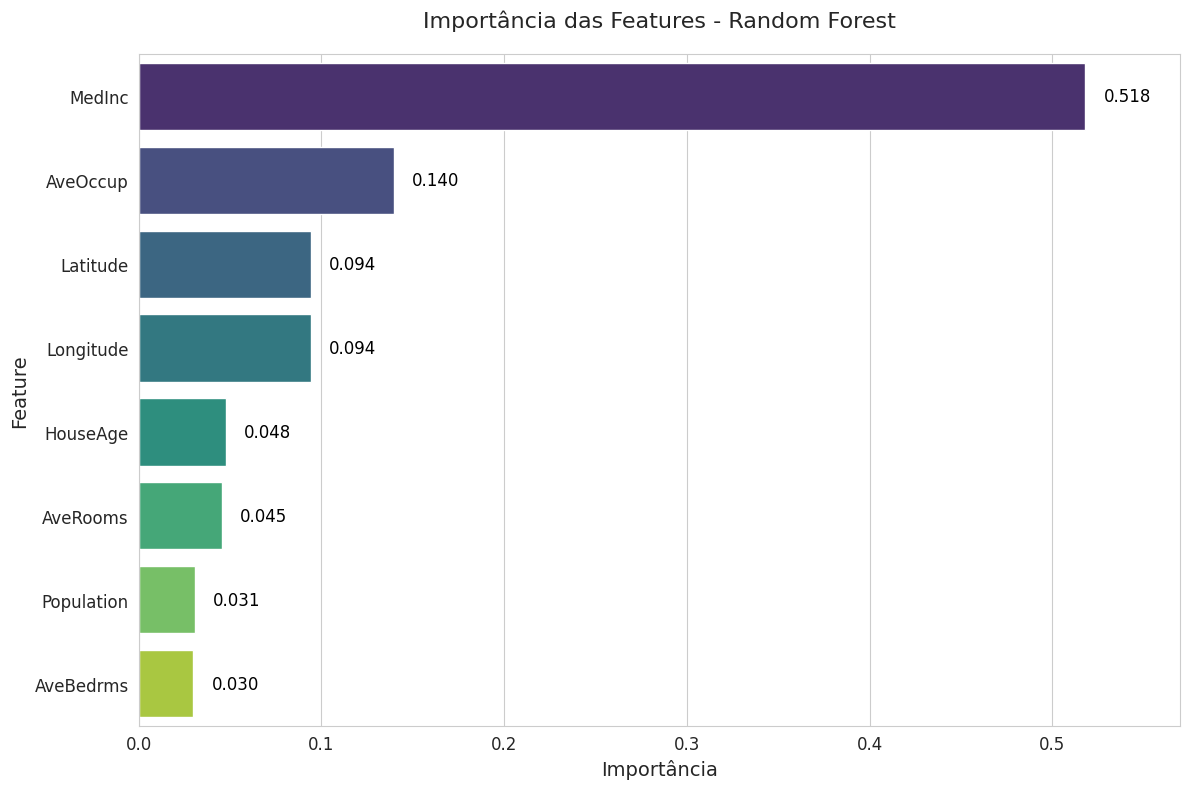

Importância das Features - XGBoost


<ipython-input-13-aa2b499ea777>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


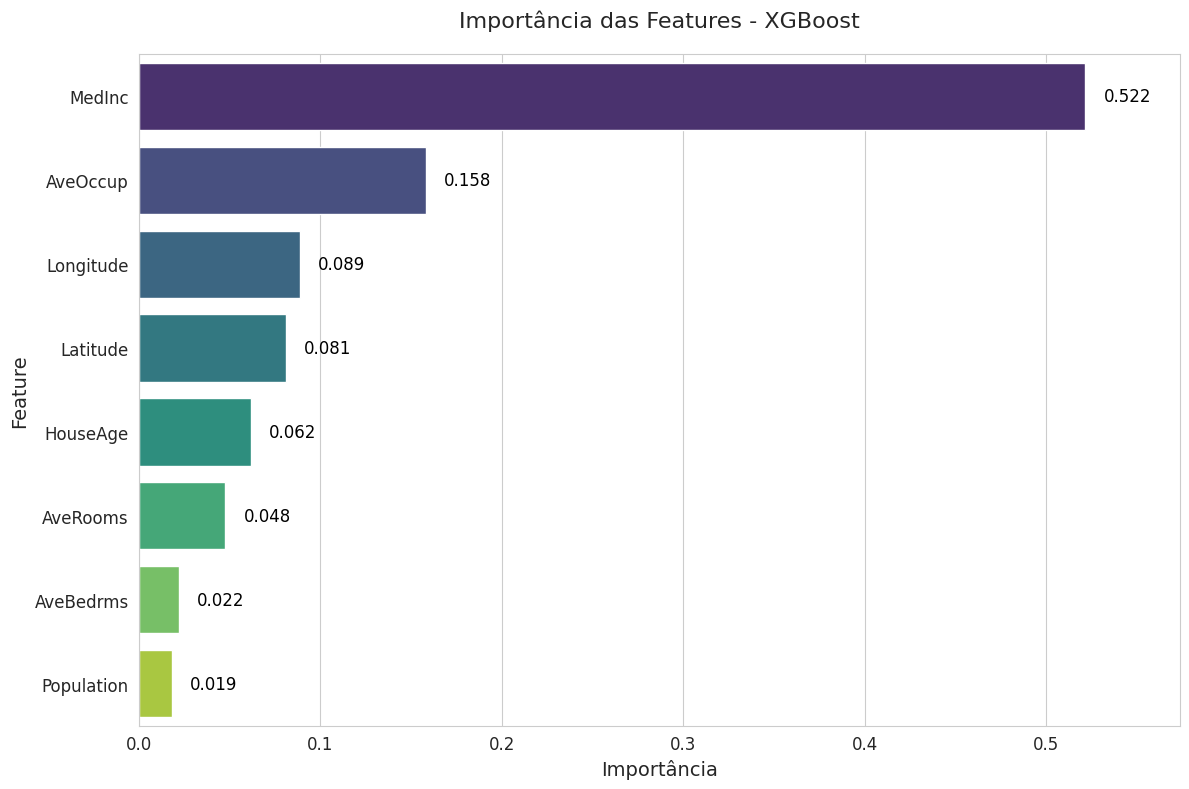

In [13]:
# Função para plotar importância das features com alta definição
def plot_feature_importance(importance, names, model_name):
    # Criar DataFrame com as features e importâncias
    feature_importance = pd.DataFrame({'Feature': names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Configurações do gráfico
    plt.figure(figsize=(12, 8))  # Aumentar o tamanho da figura
    sns.set_style("whitegrid")  # Usar um estilo limpo e moderno
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")

    # Adicionar valores numéricos nas barras
    for i, v in enumerate(feature_importance['Importance']):
        ax.text(v + 0.01, i, f'{v:.3f}', color='black', va='center', fontsize=12)  # Formatar valores com 3 casas decimais

    # Melhorar a aparência do gráfico
    plt.title(f'Importância das Features - {model_name}', fontsize=16, pad=20)
    plt.xlabel('Importância', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, feature_importance['Importance'].max() * 1.1)  # Ajustar limite do eixo x
    plt.tight_layout()  # Melhorar o espaçamento
    plt.show()


print("Importâncias - Random Forest:", rf.feature_importances_)

print("Importâncias - XGBoost:", xgb.feature_importances_)

# Importância das features no Random Forest
print("Importância das Features - Random Forest")
plot_feature_importance(rf.feature_importances_, X.columns, 'Random Forest')

# Importância das features no XGBoost
print("Importância das Features - XGBoost")
plot_feature_importance(xgb.feature_importances_, X.columns, 'XGBoost')

# Boston Housing

In [14]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import requests

# Baixar o dataset do Boston Housing
url = "http://lib.stat.cmu.edu/datasets/boston"
response = requests.get(url)
data_str = response.text

# Processar os dados
data_lines = data_str.split("\n")[22:]  # Ignorar cabeçalhos

# O dataset original tem 14 colunas, mas está dividido em duas linhas por registro
data_values = []
temp_row = []

for line in data_lines:
    if line.strip():  # Ignorar linhas vazias
        numbers = list(map(float, line.split()))
        temp_row.extend(numbers)  # Adicionar os valores à linha temporária

        if len(temp_row) == 14:  # Se já temos as 14 colunas, adicionamos aos dados
            data_values.append(temp_row)
            temp_row = []  # Resetar linha temporária para o próximo registro

# Criar DataFrame
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
df = pd.DataFrame(data_values, columns=column_names)

# Renomear a variável alvo (MEDV) para "Preco"
df.rename(columns={"MEDV": "Preco"}, inplace=True)

# Exibir as primeiras linhas do dataset
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
# Entender a estrutura dos dados
df.describe()
df.info()  # Verificar tipos de dados e valores faltantes

# Verificar a contagem da variável categórica CHAS (0 = não perto do rio, 1 = perto do rio)
print("\nDistribuição da variável CHAS:")
print(df["CHAS"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Preco    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB

Distribuição da variável CHAS:
CHAS
0.0    471
1.0     35
Name: count, dtype: int64


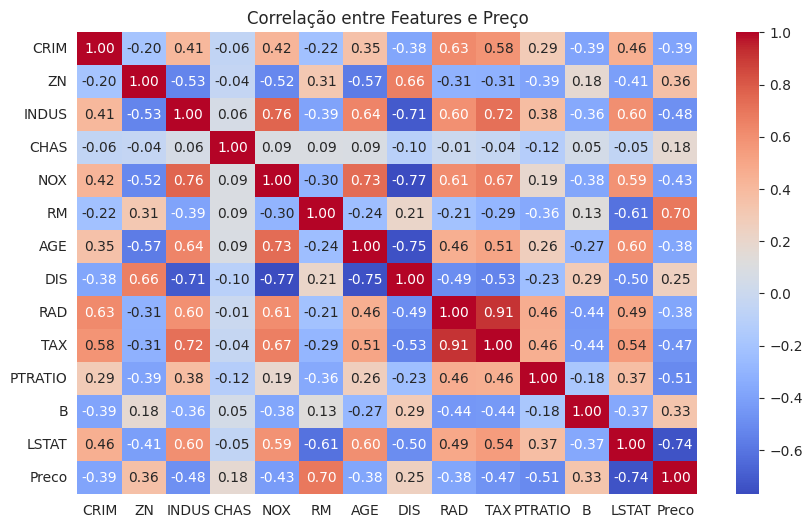

In [16]:
# Visualizar correlações
plt.figure(figsize=(10, 6))

# Converter CHAS para float para evitar avisos do Seaborn
df_corr = df.copy()
df_corr["CHAS"] = df_corr["CHAS"].astype(float)

sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Features e Preço')
plt.show()

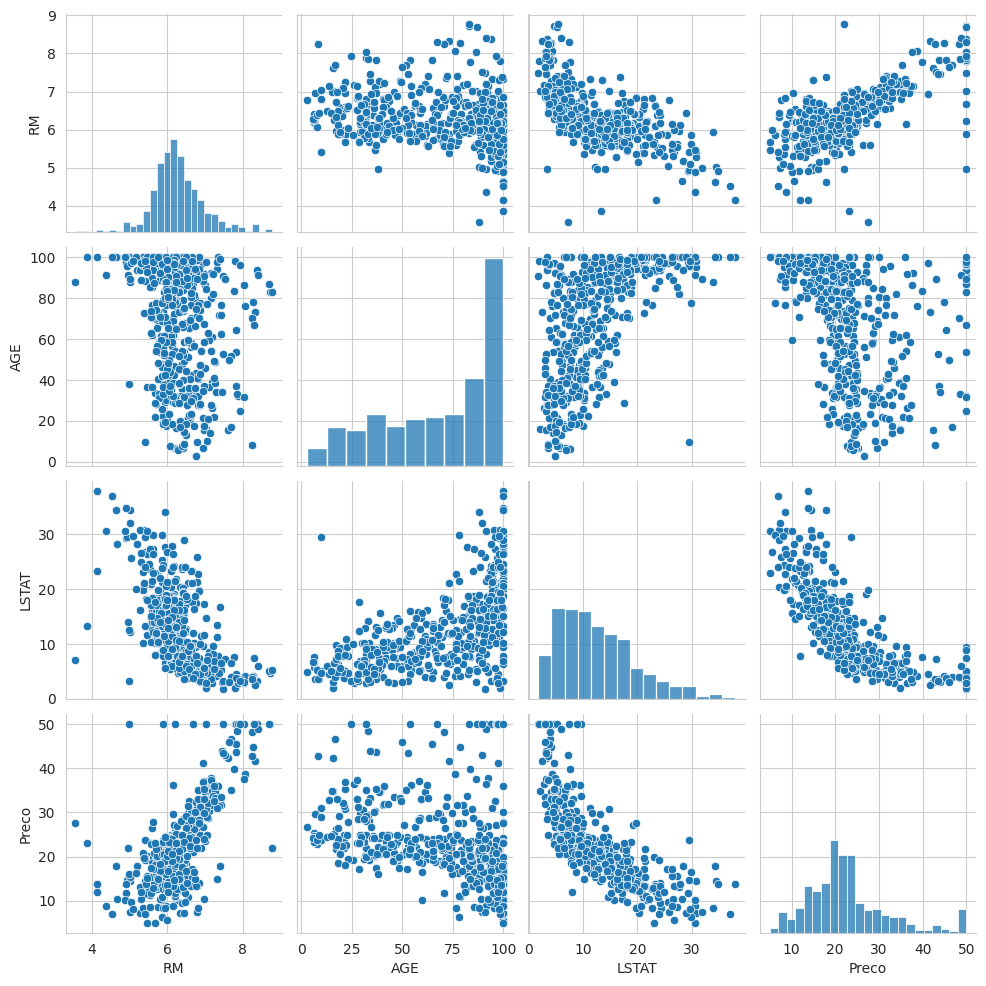

In [17]:
# Plotar distribuições das principais variáveis
sns.pairplot(df[['RM', 'AGE', 'LSTAT', 'Preco']])
plt.show()

In [18]:
# Tratar outliers
# Exemplo: Remover registros com "RM" > 8 (valores muito acima da média são atípicos)
df = df[df['RM'] <= 8]


In [19]:
# Dividir dataset em treino e teste
X = df.drop('Preco', axis=1)  # Features
y = df['Preco']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Normalizar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Modelo 1: Regressão Linear
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [22]:
# Modelo 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [23]:
# Modelo 3: XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

In [24]:
# Avaliação dos Modelos
# Calcular Métricas:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name}:')
    print(f'MSE: {mse:.2f}')
    print(f'R²: {r2:.2f}\n')

evaluate_model(y_test, y_pred_lr, 'Regressão Linear')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

Regressão Linear:
MSE: 16.63
R²: 0.75

Random Forest:
MSE: 6.63
R²: 0.90

XGBoost:
MSE: 6.52
R²: 0.90



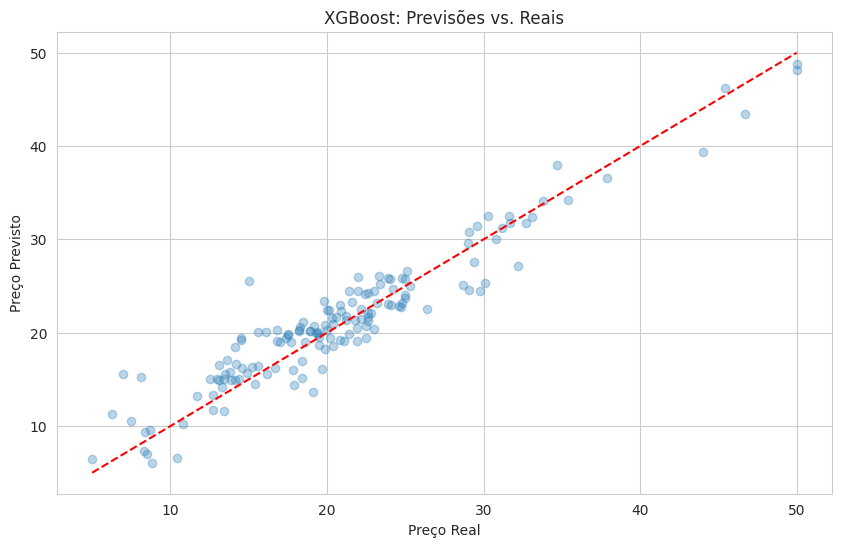

In [25]:
# Interpretação e Visualização
# Comparar previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ajustado para y_test
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('XGBoost: Previsões vs. Reais')
plt.show()

Importâncias - Random Forest: [0.06737111 0.00162529 0.00760809 0.00127919 0.03475744 0.25785597
 0.01752363 0.06372836 0.00365654 0.01223015 0.01413212 0.01533928
 0.50289284]
Importâncias - XGBoost: [0.01684378 0.00396826 0.00776545 0.01011348 0.03639977 0.11519428
 0.01426751 0.05980571 0.02435657 0.03041843 0.04059916 0.01343436
 0.62683326]
Importância das Features - Random Forest


<ipython-input-26-d54386796694>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


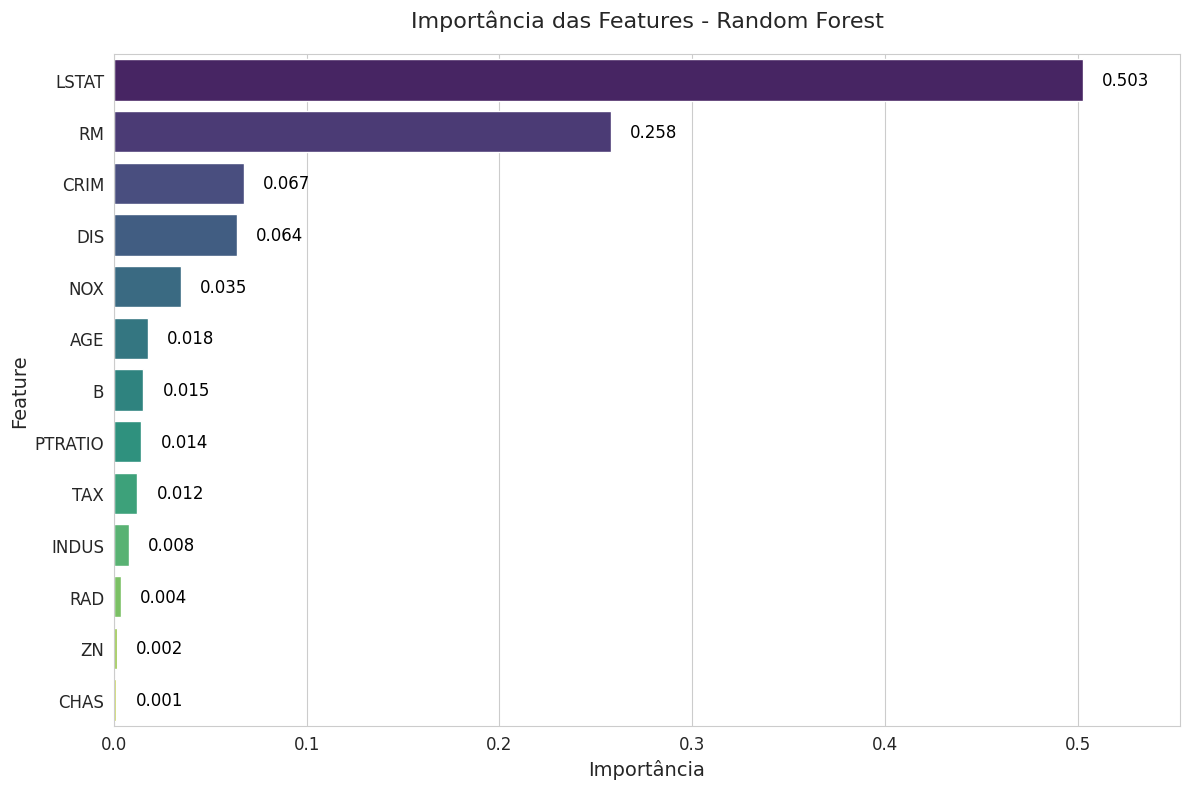

Importância das Features - XGBoost


<ipython-input-26-d54386796694>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


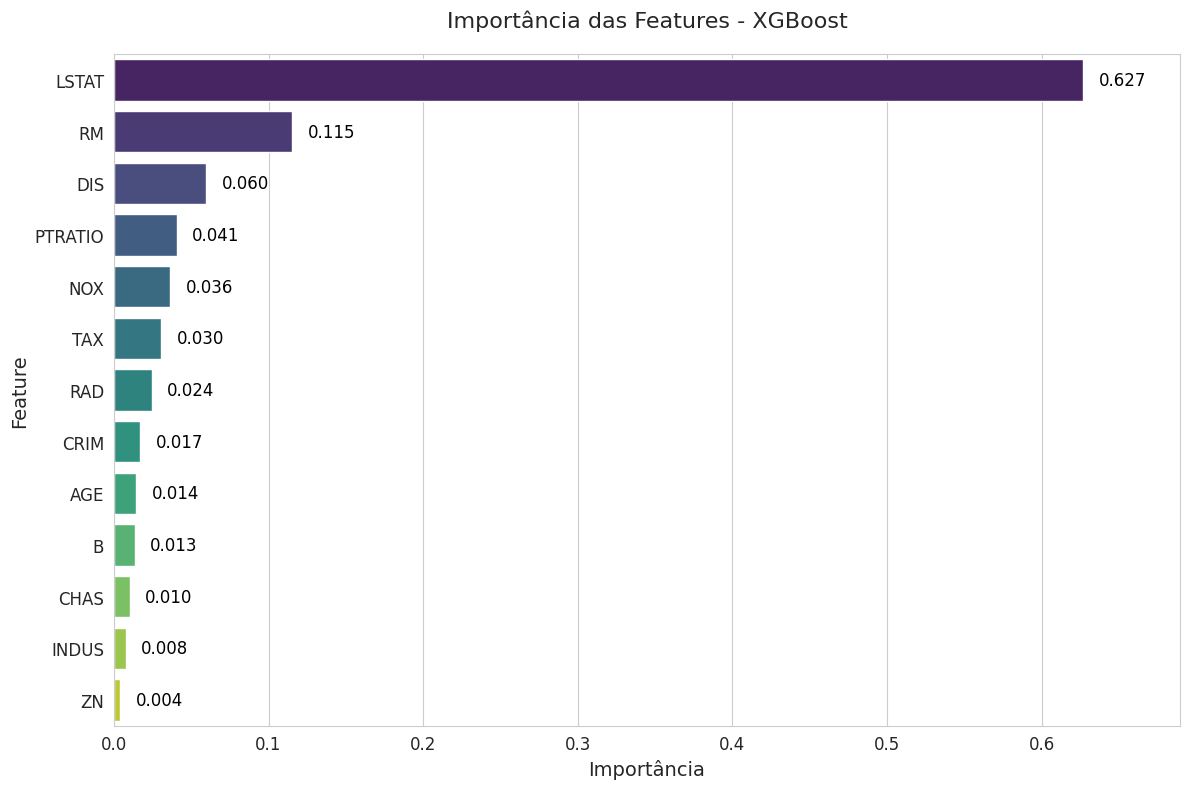

In [26]:
# Função para plotar importância das features com alta definição
def plot_feature_importance(importance, names, model_name):
    # Criar DataFrame com as features e importâncias
    feature_importance = pd.DataFrame({'Feature': names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Evitar problemas de escala removendo importâncias muito pequenas
    feature_importance = feature_importance[feature_importance['Importance'] > 0]

    # Configurações do gráfico
    plt.figure(figsize=(12, 8))  # Aumentar o tamanho da figura
    sns.set_style("whitegrid")  # Usar um estilo limpo e moderno
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")

    # Adicionar valores numéricos nas barras
    for i, v in enumerate(feature_importance['Importance']):
        ax.text(v + 0.01, i, f'{v:.3f}', color='black', va='center', fontsize=12)  # Formatar valores com 3 casas decimais

    # Melhorar a aparência do gráfico
    plt.title(f'Importância das Features - {model_name}', fontsize=16, pad=20)
    plt.xlabel('Importância', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, feature_importance['Importance'].max() * 1.1)  # Ajustar limite do eixo x
    plt.tight_layout()  # Melhorar o espaçamento
    plt.show()


print("Importâncias - Random Forest:", rf.feature_importances_)
print("Importâncias - XGBoost:", xgb.feature_importances_)

# Importância das features no Random Forest
print("Importância das Features - Random Forest")
plot_feature_importance(rf.feature_importances_, X.columns, 'Random Forest')

# Importância das features no XGBoost
print("Importância das Features - XGBoost")
plot_feature_importance(xgb.feature_importances_, X.columns, 'XGBoost')

# ColumnTransformer

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Voltando ao dataset California Housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Preco'] = data.target

# Dividir em treino e teste
X = df.drop('Preco', axis=1)
y = df['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir transformadores para diferentes tipos de colunas
# Neste caso, todas são numéricas, mas vamos simular como seria com diferentes tipos
numeric_features = X.columns.tolist()  # Todas as colunas são numéricas neste dataset

# Criar o ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

# Criar pipelines para cada modelo
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Treinar os pipelines
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

# Avaliar os modelos
y_pred_lr_pipe = pipeline_lr.predict(X_test)
y_pred_rf_pipe = pipeline_rf.predict(X_test)
y_pred_xgb_pipe = pipeline_xgb.predict(X_test)

evaluate_model(y_test, y_pred_lr_pipe, 'Pipeline - Regressão Linear')
evaluate_model(y_test, y_pred_rf_pipe, 'Pipeline - Random Forest')
evaluate_model(y_test, y_pred_xgb_pipe, 'Pipeline - XGBoost')

Pipeline - Regressão Linear:
MSE: 0.53
R²: 0.60

Pipeline - Random Forest:
MSE: 0.26
R²: 0.80

Pipeline - XGBoost:
MSE: 0.23
R²: 0.83



# GridSearchCV no XGBoost

In [28]:
from sklearn.model_selection import GridSearchCV

# Definir o pipeline para XGBoost
pipeline_xgb_tune = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Definir os hiperparâmetros para busca
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0]
}

# Para evitar crash da máquina, reduzimos o grid
param_grid_small = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_xgb_tune,
    param_grid=param_grid_small,  # Use param_grid_small para evitar sobrecarga
    cv=3,  # Reduzido para 3 para economizar tempo
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1  # Use todos os cores disponíveis
)

# Executar a busca
grid_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print(f"Melhor score: {-grid_search.best_score_:.4f} MSE")

# Avaliar o melhor modelo
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
evaluate_model(y_test, y_pred_best_xgb, 'Melhor XGBoost após GridSearchCV')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Melhores parâmetros encontrados:
{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Melhor score: 0.2313 MSE
Melhor XGBoost após GridSearchCV:
MSE: 0.22
R²: 0.84



# Transformações Não Lineares

XGBoost com transformação logarítmica:
MSE: 0.23
R²: 0.82

Comparação entre modelos XGBoost:
Sem transformação: R² = 0.8272
Com transformação log: R² = 0.8244


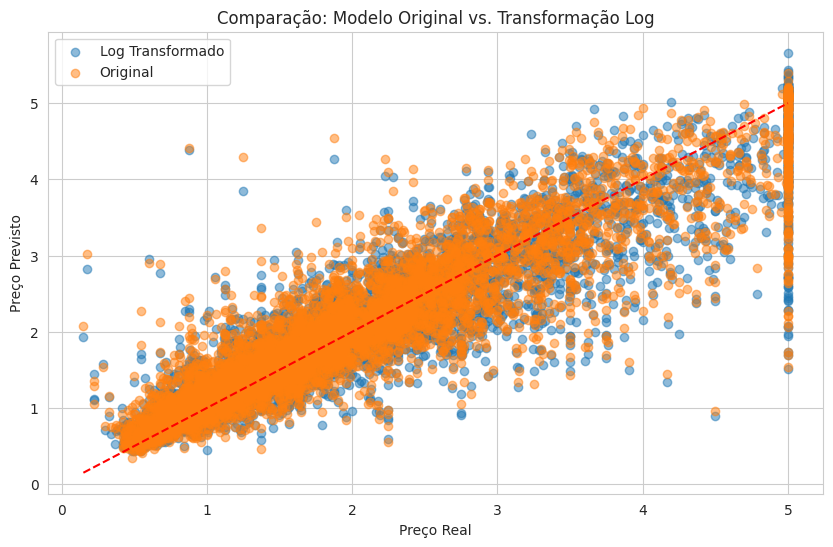

In [29]:
# Aplicar transformação logarítmica no preço
# Nota: Adicionamos 1 para evitar log(0)
y_log = np.log1p(y)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Criar pipeline para modelo com target transformado
pipeline_xgb_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Treinar o modelo
pipeline_xgb_log.fit(X_train, y_train_log)

# Fazer previsões e transformar de volta
y_pred_log = pipeline_xgb_log.predict(X_test)
y_pred_exp = np.expm1(y_pred_log)  # Transformar de volta

# Avaliar o modelo
evaluate_model(y_test, y_pred_exp, 'XGBoost com transformação logarítmica')

# Comparar com o modelo sem transformação
print("Comparação entre modelos XGBoost:")
print(f"Sem transformação: R² = {r2_score(y_test, y_pred_xgb_pipe):.4f}")
print(f"Com transformação log: R² = {r2_score(y_test, y_pred_exp):.4f}")

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_exp, alpha=0.5, label='Log Transformado')
plt.scatter(y_test, y_pred_xgb_pipe, alpha=0.5, label='Original')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Comparação: Modelo Original vs. Transformação Log')
plt.legend()
plt.show()